<a href="https://colab.research.google.com/github/nutan1202/Projects/blob/main/Hey_CarProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
path = "/content/drive/MyDrive/cars_engage_2022.xlsx"

In [ ]:
df = pd.read_excel(path)

In [ ]:
display(pd.DataFrame(df))
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# this is to view the all the columns and rows at the same time

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0.0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271.0,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272.0,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273.0,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274.0,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()
# we are analysing the mean std and other values for the column having float or int values

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [ ]:
df.isnull().sum()

Unnamed: 0                                      0
Make                                           75
Model                                           0
Variant                                         0
Ex-Showroom_Price                               0
Displacement                                   12
Cylinders                                      66
Valves_Per_Cylinder                           102
Drivetrain                                      7
Cylinder_Configuration                         13
Emission_Norm                                  11
Engine_Location                                43
Fuel_System                                     8
Fuel_Tank_Capacity                             69
Fuel_Type                                       0
Height                                          1
Length                                          0
Width                                          12
Body_Type                                       6
Doors                                           4


In [ ]:
print(df.keys())
# looking for all the columns so that unwanted columns can be removed

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)


In [ ]:
for col_name in df.columns: 
    print(col_name)
    #list representation of the same

Unnamed: 0
Make
Model
Variant
Ex-Showroom_Price
Displacement
Cylinders
Valves_Per_Cylinder
Drivetrain
Cylinder_Configuration
Emission_Norm
Engine_Location
Fuel_System
Fuel_Tank_Capacity
Fuel_Type
Height
Length
Width
Body_Type
Doors
City_Mileage
Highway_Mileage
ARAI_Certified_Mileage
ARAI_Certified_Mileage_for_CNG
Kerb_Weight
Gears
Ground_Clearance
Front_Brakes
Rear_Brakes
Front_Suspension
Rear_Suspension
Front_Track
Rear_Track
Front_Tyre_&_Rim
Rear_Tyre_&_Rim
Power_Steering
Power_Windows
Power_Seats
Keyless_Entry
Power
Torque
Odometer
Speedometer
Tachometer
Tripmeter
Seating_Capacity
Seats_Material
Type
Wheelbase
Wheels_Size
Start_/_Stop_Button
12v_Power_Outlet
Audiosystem
Aux-in_Compatibility
Average_Fuel_Consumption
Basic_Warranty
Bluetooth
Boot-lid_Opener
Boot_Space
CD_/_MP3_/_DVD_Player
Central_Locking
Child_Safety_Locks
Clock
Cup_Holders
Distance_to_Empty
Door_Pockets
Engine_Malfunction_Light
Extended_Warranty
FM_Radio
Fuel-lid_Opener
Fuel_Gauge
Handbrake
Instrument_Console
Low_Fu

In [ ]:
df.dtypes
# having a overview of the type of values of different parameters

Unnamed: 0                                   float64
Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b44218b50>,
      dtype=object)

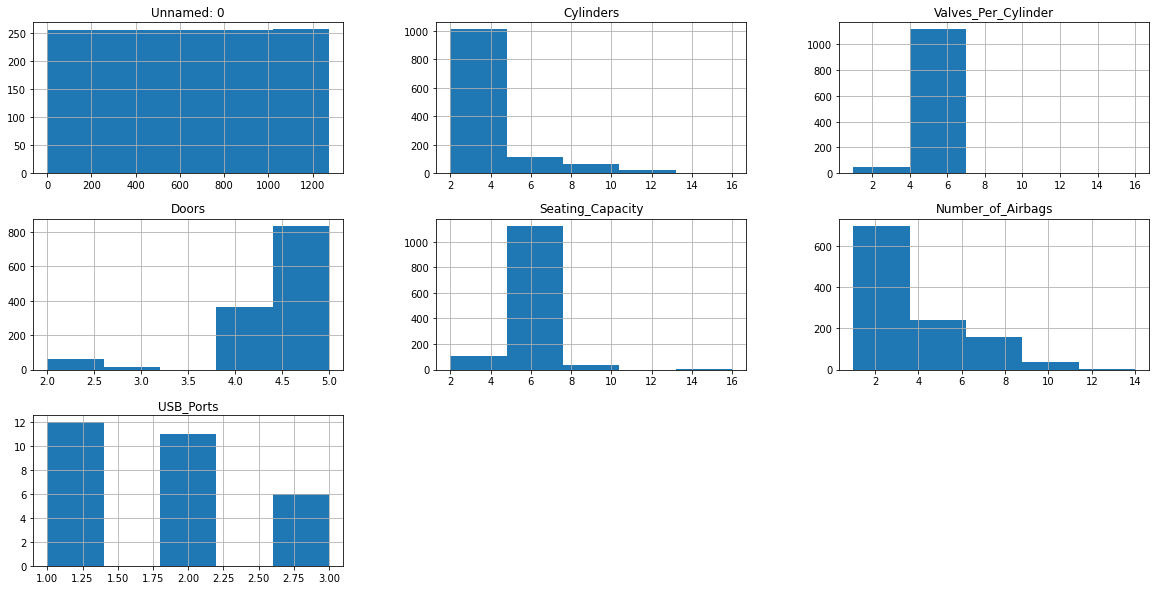

In [ ]:
df.hist(bins=5, figsize=(20,10))
# plotting histograms to have a view of the value till which a significant number of observations are there and removing the rest

In [ ]:
df['12v_Power_Outlet'].value_counts()

Yes    887
2.0    133
1.0     58
3.0     38
4.0      6
Name: 12v_Power_Outlet, dtype: int64

In [ ]:
df['Seating_Capacity'].value_counts()

5.0     915
7.0     183
4.0      70
2.0      39
6.0      26
9.0      19
8.0      17
16.0      1
Name: Seating_Capacity, dtype: int64

In [ ]:
df['Number_of_Airbags'].value_counts()

2.0     627
6.0     202
8.0      92
7.0      65
1.0      57
4.0      40
9.0      21
3.0      17
10.0     16
14.0      3
5.0       1
Name: Number_of_Airbags, dtype: int64

In [ ]:
df['Doors'].value_counts()

5.0    836
4.0    362
2.0     62
3.0     12
Name: Doors, dtype: int64

In [ ]:
df_subset = df[['Model','Seating_Capacity','Body_Type','City_Mileage','Displacement','Highway_Mileage','Ex-Showroom_Price','Cylinders','Doors','Power','Length','Valves_Per_Cylinder','Variant','ABS_(Anti-lock_Braking_System)','Fuel_Type','Number_of_Airbags']]
df_subset

,Model,Seating_Capacity,Body_Type,City_Mileage,Displacement,Highway_Mileage,Ex-Showroom_Price,Cylinders,Doors,Power,Length,Valves_Per_Cylinder,Variant,ABS_(Anti-lock_Braking_System),Fuel_Type,Number_of_Airbags
0,Nano Genx,4.0,Hatchback,?23.6 km/litre,624 cc,NaN,"Rs. 2,92,667",2.0,5.0,38PS@5500rpm,3164 mm,2.0,Xt,NaN,Petrol,NaN
1,Nano Genx,4.0,Hatchback,?23.6 km/litre,624 cc,NaN,"Rs. 2,36,447",2.0,5.0,38PS@5500rpm,3164 mm,2.0,Xe,NaN,Petrol,NaN
2,Nano Genx,4.0,Hatchback,NaN,624 cc,NaN,"Rs. 2,96,661",2.0,4.0,38PS@5500rpm,3164 mm,2.0,Emax Xm,NaN,CNG,NaN
3,Nano Genx,4.0,Hatchback,?23.6 km/litre,624 cc,NaN,"Rs. 3,34,768",2.0,5.0,38PS@5500rpm,3164 mm,2.0,Xta,NaN,Petrol,NaN
4,Nano Genx,4.0,Hatchback,?23.6 km/litre,624 cc,NaN,"Rs. 2,72,223",2.0,5.0,38PS@5500rpm,3164 mm,2.0,Xm,NaN,Petrol,NaN
5,Nano Genx,4.0,Hatchback,?23.6 km/litre,624 cc,NaN,"Rs. 3,14,815",2.0,5.0,38PS@5500rpm,3164 mm,2.0,Xma,NaN,Petrol,NaN
6,Redi-Go,5.0,Hatchback,21.38 km/litre,799 cc,24 km/litre,"Rs. 2,79,650",3.0,5.0,54PS@5678rpm,3429 mm,4.0,D,Yes,Petrol,NaN
7,Redi-Go,5.0,Hatchback,21.38 km/litre,799 cc,24 km/litre,"Rs. 3,51,832",3.0,5.0,54PS@5678rpm,3429 mm,4.0,T,NaN,Petrol,NaN
8,Redi-Go,5.0,Hatchback,21.38 km/litre,799 cc,24 km/litre,"Rs. 3,33,419",3.0,5.0,54PS@5678rpm,3429 mm,4.0,A,NaN,Petrol,NaN
9,Redi-Go,5.0,Hatchback,21.38 km/litre,799 cc,24 km/litre,"Rs. 3,62,000",3.0,5.0,54PS@5678rpm,3429 mm,4.0,S,NaN,Petrol,NaN


In [ ]:
df_subset['Body_Type'].value_counts()

SUV                    447
Sedan                  333
Hatchback              316
Coupe                   41
MUV                     39
MPV                     39
Convertible             20
Crossover               18
Sports                   3
Pick-up                  3
Sports, Convertible      2
Sedan, Coupe             2
Crossover, SUV           2
SUV, Crossover           2
Sports, Hatchback        1
Sedan, Crossover         1
Coupe, Convertible       1
Name: Body_Type, dtype: int64

In [ ]:
df_subset.isna().sum()
# missing values in the data set

Model                               0
Seating_Capacity                    6
Body_Type                           6
City_Mileage                      555
Displacement                       12
Highway_Mileage                   800
Ex-Showroom_Price                   0
Cylinders                          66
Doors                               4
Power                               0
Length                              0
Valves_Per_Cylinder               102
Variant                             0
ABS_(Anti-lock_Braking_System)    132
Fuel_Type                           0
Number_of_Airbags                 135
dtype: int64

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Model                           1276 non-null   object 
 1   Seating_Capacity                1270 non-null   float64
 2   Body_Type                       1270 non-null   object 
 3   City_Mileage                    721 non-null    object 
 4   Displacement                    1264 non-null   object 
 5   Highway_Mileage                 476 non-null    object 
 6   Ex-Showroom_Price               1276 non-null   object 
 7   Cylinders                       1210 non-null   float64
 8   Doors                           1272 non-null   float64
 9   Power                           1276 non-null   object 
 10  Length                          1276 non-null   object 
 11  Valves_Per_Cylinder             1174 non-null   float64
 12  Variant                         12

In [ ]:
df_subset['Seating_Capacity'] = df_subset['Seating_Capacity'].fillna(df_subset['Seating_Capacity'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['Cylinders'] = df_subset['Cylinders'].fillna(df_subset['Cylinders'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['Number_of_Airbags'] = df_subset['Number_of_Airbags'].fillna(df_subset['Number_of_Airbags'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['Valves_Per_Cylinder'] = df_subset['Valves_Per_Cylinder'].fillna(df_subset['Valves_Per_Cylinder'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Average_Speed'].value_counts()

Yes    764
Name: Average_Speed, dtype: int64

In [ ]:
df_subset['City_Mileage']=df_subset['City_Mileage'].str.replace("km/litre","")
df_subset['City_Mileage']=df_subset['City_Mileage'].str.replace("26032.00000","20")
df_subset['Highway_Mileage']=df_subset['Highway_Mileage'].str.replace("km/litre","")

df_subset['Ex-Showroom_Price']=df_subset['Ex-Showroom_Price'].str.replace("Rs.","").str.replace(",","")
df_subset['Length']=df_subset['Length'].str.replace("mm","")
df_subset['Displacement']=df_subset['Displacement'].str.replace("cc","")
df_subset['Displacement']=pd.to_numeric(df_subset['Displacement'],errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWar

In [ ]:
df_subset['Ex-Showroom_Price']=pd.to_numeric(df_subset['Ex-Showroom_Price'],errors='coerce')
df_subset['City_Mileage']=pd.to_numeric(df_subset['City_Mileage'],errors='coerce')
df_subset['Highway_Mileage']=pd.to_numeric(df_subset['Highway_Mileage'],errors='coerce')
df_subset['Length']=pd.to_numeric(df_subset['Length'],errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_subset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Model                           1276 non-null   object 
 1   Seating_Capacity                1276 non-null   float64
 2   Body_Type                       1270 non-null   object 
 3   City_Mileage                    682 non-null    float64
 4   Displacement                    1264 non-null   float64
 5   Highway_Mileage                 475 non-null    float64
 6   Ex-Showroom_Price               1276 non-null   int64  
 7   Cylinders                       1276 non-null   float64
 8   Doors                           1272 non-null   float64
 9   Power                           1276 non-null   object 
 10  Length                          1276 non-null   float64
 11  Valves_Per_Cylinder             1276 non-null   float64
 12  Variant                         12

In [ ]:
df_subset.describe()

,Seating_Capacity,City_Mileage,Displacement,Highway_Mileage,Ex-Showroom_Price,Cylinders,Doors,Length,Valves_Per_Cylinder,Number_of_Airbags
count,1276.000000,682.000000,1264.000000,475.000000,1.276000e+03,1276.000000,1272.000000,1276.000000,1276.000000,1276.000000
mean,5.270079,53.827170,1858.804589,16.901326,4.596538e+06,4.380992,4.550314,4296.883730,3.977853,3.787029
std,1.142533,996.257891,1063.152389,4.910046,1.214735e+07,1.617396,0.747816,476.612977,0.799718,2.385125
min,2.000000,2.000000,72.000000,4.000000,2.364470e+05,2.000000,2.000000,4.640000,1.000000,1.000000
25%,5.000000,11.400000,1198.000000,13.800000,7.438760e+05,4.000000,4.000000,3991.750000,4.000000,2.000000
50%,5.000000,15.100000,1497.000000,17.190000,1.060064e+06,4.000000,5.000000,4331.000000,4.000000,2.000000
75%,5.000000,19.000000,1998.000000,20.500000,2.979828e+06,4.000000,5.000000,4620.000000,4.000000,6.000000
max,16.000000,26032.000000,7993.000000,25.600000,2.121554e+08,16.000000,5.000000,6092.000000,16.000000,14.000000


In [ ]:
df_subset.isna().sum()


Model                               0
Seating_Capacity                    0
Body_Type                           6
City_Mileage                      594
Displacement                       12
Highway_Mileage                   801
Ex-Showroom_Price                   0
Cylinders                           0
Doors                               4
Power                               0
Length                              0
Valves_Per_Cylinder                 0
Variant                             0
ABS_(Anti-lock_Braking_System)    132
Fuel_Type                           0
Number_of_Airbags                   0
dtype: int64

In [ ]:
df_subset['ABS_(Anti-lock_Braking_System)'] = df_subset['ABS_(Anti-lock_Braking_System)'].fillna('Yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['Body_Type'] = df_subset['Body_Type'].fillna('SUV')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['Doors'] = df_subset['Doors'].fillna('5.0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_subset['City_Mileage'] = df_subset['City_Mileage'].fillna(df_subset['City_Mileage'].mean())
df_subset['Highway_Mileage'] = df_subset['Highway_Mileage'].fillna(df_subset['Highway_Mileage'].mean())
df_subset['Displacement'] = df_subset['Displacement'].fillna(df_subset['Displacement'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_subset.isnull().sum()

Model                             0
Seating_Capacity                  0
Body_Type                         0
City_Mileage                      0
Displacement                      0
Highway_Mileage                   0
Ex-Showroom_Price                 0
Cylinders                         0
Doors                             0
Power                             0
Length                            0
Valves_Per_Cylinder               0
Variant                           0
ABS_(Anti-lock_Braking_System)    0
Fuel_Type                         0
Number_of_Airbags                 0
dtype: int64

In [ ]:
df_subset['City_Mileage'].value_counts()

53.82717       594
12.00000        38
16.00000        30
18.00000        26
14.00000        20
23.00000        19
15.10000        16
20.00000        13
25.17000        12
11.20000        11
15.50000        11
16.30000        11
8.60000         11
22.25000        11
21.40000        10
19.00000        10
18.49000        10
20.30000         9
11.50000         9
12.80000         9
13.20000         9
9.50000          9
13.30000         9
10.20000         8
19.20000         8
15.29000         8
18.90000         7
21.04000         7
21.38000         7
5.60000          7
12.40000         7
6.50000          7
9.00000          7
23.84000         7
20.89000         6
17.00000         6
18.40000         6
24.12000         6
13.80000         6
17.01000         6
20.60000         5
16.20000         5
13.10000         5
10.60000         5
9.40000          5
9.30000          5
14.30000         5
5.00000          5
11.30000         5
25.50000         5
15.30000         5
5.70000          5
15.70000    

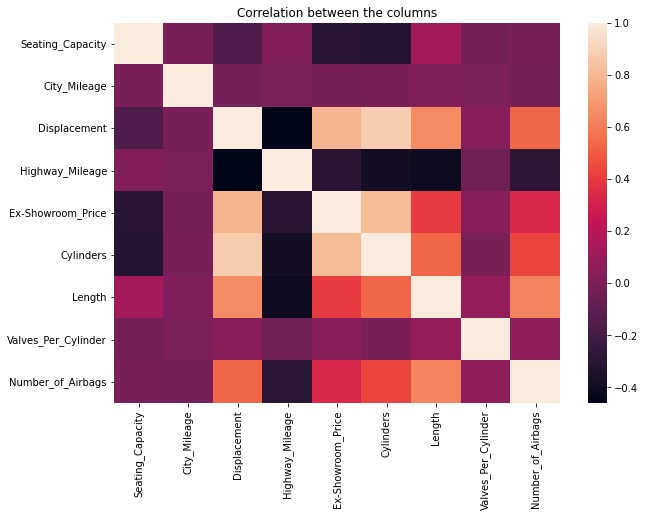

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df_subset.corr(), annot=False)
plt.title('Correlation between the columns')
plt.show()

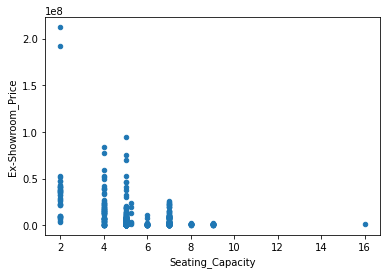

<Figure size 864x504 with 0 Axes>

In [ ]:
df_subset.plot(kind='scatter',x='Seating_Capacity',y='Ex-Showroom_Price')
fig=plt.figure(figsize=(12,7))
plt.show()

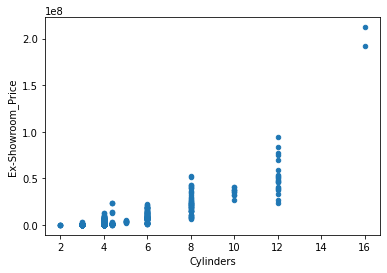

In [ ]:
df_subset.plot(kind='scatter',x='Cylinders',y='Ex-Showroom_Price')
plt.show()


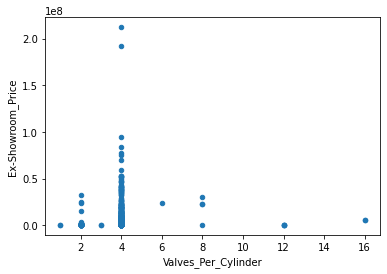

In [ ]:
df_subset.plot(kind='scatter',x='Valves_Per_Cylinder',y='Ex-Showroom_Price')
plt.show()

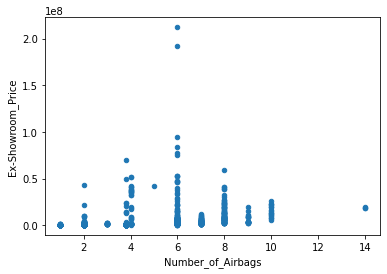

In [ ]:
df_subset.plot(kind='scatter',x='Number_of_Airbags',y='Ex-Showroom_Price')
plt.show()

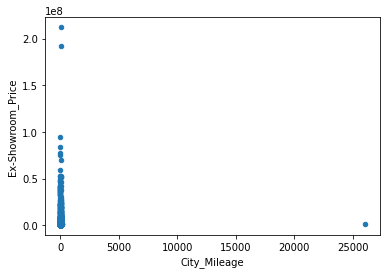

In [ ]:
df_subset.plot(kind='scatter',x='City_Mileage',y='Ex-Showroom_Price')
plt.show()

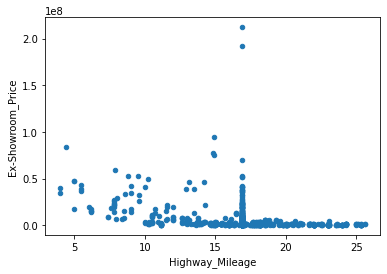

In [ ]:
df_subset.plot(kind='scatter',x='Highway_Mileage',y='Ex-Showroom_Price')
plt.show()

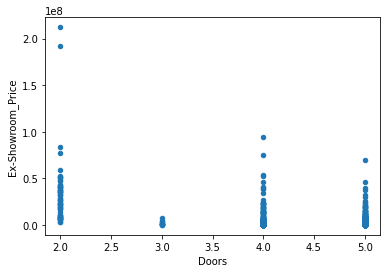

In [ ]:
df_subset.plot(kind='scatter',x='Doors',y='Ex-Showroom_Price')
plt.show()

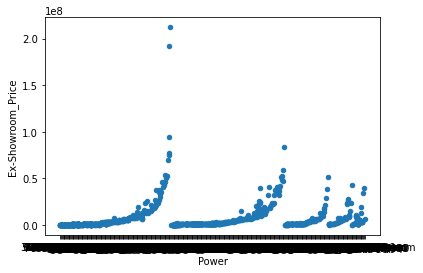

In [ ]:
df_subset.plot(kind='scatter',x='Power',y='Ex-Showroom_Price')
plt.show()

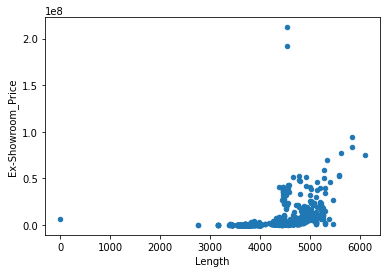

In [ ]:
df_subset.plot(kind='scatter',x='Length',y='Ex-Showroom_Price')
plt.show()

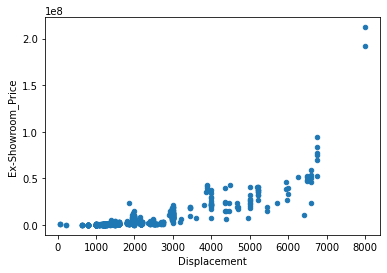

In [ ]:
df_subset.plot(kind='scatter',x='Displacement',y='Ex-Showroom_Price')
plt.show()

In [ ]:
%matplotlib notebook

In [ ]:
X=df_subset['Displacement']
Y=df_subset['Ex-Showroom_Price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
x_train

416     1197.000000
288     1995.000000
645     1497.000000
108     1193.000000
438     1497.000000
733     1956.000000
527     1368.000000
1043    1999.000000
426     1248.000000
181      999.000000
1114    1598.000000
516     1497.000000
241     1968.000000
629     2498.000000
114     1197.000000
139     1197.000000
197     1496.000000
1116    1498.000000
520     1497.000000
37      1198.000000
900     1248.000000
583     1396.000000
795     2987.000000
1262    2477.000000
276     1997.000000
1025    1595.000000
794     2987.000000
765     2694.000000
954     1493.000000
743     1597.000000
122     1396.000000
1191    1493.000000
357      216.000000
871     5204.000000
1173     998.000000
544     1248.000000
1089    1248.000000
392     1197.000000
868     5204.000000
676     2179.000000
90      1197.000000
472     1199.000000
688       72.000000
727     1368.000000
121     1197.000000
285     1395.000000
671     2179.000000
311     2987.000000
1213    2995.000000
1058    6496.000000


In [ ]:
plt.scatter(x_train,y_train,label='Training Data', color='r',alpha=.7)
plt.scatter(x_train,y_train,label='Testing Data', color='g',alpha=.7)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

In [ ]:
prediction = LR.predict(x_test.values.reshape(-1,1))
#PLOT PREDICTION
plt.plot(x_test,prediction,label = 'Linear Regression', color = 'b')
plt.scatter(x_test,y_test, label='Actual Test Data', color = 'g',alpha=.7)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
LR.score(x_test.values.reshape(-1,1), y_test.values)

0.7723572214857148

In [ ]:
LR.predict(np.array([[5950]]))[0]

42086518.20912981

In [ ]:
X=df_subset['Cylinders']
Y=df_subset['Ex-Showroom_Price']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
x_train

1055     6.000000
224      4.000000
848      8.000000
125      4.000000
653      4.000000
1106     4.000000
420      4.000000
375      3.000000
876     12.000000
340      8.000000
165      4.000000
1191     3.000000
985      4.000000
428      4.000000
297      6.000000
482      4.000000
933      4.000000
99       4.000000
321      4.000000
1036     8.000000
630      4.000000
1085     4.000000
269      5.000000
863     10.000000
1198     4.000000
190      4.000000
1064     4.000000
1167     6.000000
1211     6.000000
865     10.000000
704      4.000000
199      4.000000
622      4.000000
95       4.000000
148      4.000000
479      4.000000
14       3.000000
562      4.000000
288      4.000000
500      4.000000
32       3.000000
454      3.000000
1195     3.000000
1187     3.000000
323      6.000000
1252     4.000000
191      4.000000
1251     4.000000
646      4.000000
869     10.000000
1174     3.000000
979      4.380992
1037     4.000000
680      4.000000
1183     3.000000
599      4

In [ ]:
plt.scatter(x_train,y_train,label='Training Data', color='r',alpha=.7)
plt.scatter(x_train,y_train,label='Testing Data', color='g',alpha=.7)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(x_test.values.reshape(-1,1))
#PLOT PREDICTION
plt.plot(x_test,prediction,label = 'Linear Regression', color = 'b')
plt.scatter(x_test,y_test, label='Actual Test Data', color = 'g',alpha=.7)
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
LR.score(x_test.values.reshape(-1,1), y_test.values)


0.5711609583469179

In [ ]:
LR.predict(np.array([[12]]))[0]

42391897.29287134

In [ ]:
df_subset1 = df_subset[['Seating_Capacity','City_Mileage','Displacement','Highway_Mileage','Ex-Showroom_Price','Cylinders','Length','Valves_Per_Cylinder']]
df_subset1

,Seating_Capacity,City_Mileage,Displacement,Highway_Mileage,Ex-Showroom_Price,Cylinders,Length,Valves_Per_Cylinder
0,4.000000,53.82717,624.000000,16.901326,292667,2.000000,3164.00,2.000000
1,4.000000,53.82717,624.000000,16.901326,236447,2.000000,3164.00,2.000000
2,4.000000,53.82717,624.000000,16.901326,296661,2.000000,3164.00,2.000000
3,4.000000,53.82717,624.000000,16.901326,334768,2.000000,3164.00,2.000000
4,4.000000,53.82717,624.000000,16.901326,272223,2.000000,3164.00,2.000000
5,4.000000,53.82717,624.000000,16.901326,314815,2.000000,3164.00,2.000000
6,5.000000,21.38000,799.000000,24.000000,279650,3.000000,3429.00,4.000000
7,5.000000,21.38000,799.000000,24.000000,351832,3.000000,3429.00,4.000000
8,5.000000,21.38000,799.000000,24.000000,333419,3.000000,3429.00,4.000000
9,5.000000,21.38000,799.000000,24.000000,362000,3.000000,3429.00,4.000000


In [ ]:
X = df_subset1.drop('Ex-Showroom_Price',axis='columns')
y = df_subset1['Ex-Showroom_Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

      279650       0.00      0.00      0.00         0
      283290       0.00      0.00      0.00         1
      294800       0.00      0.00      0.00         0
      351832       0.00      0.00      0.00         1
      353290       0.00      0.00      0.00         1
      357200       0.00      0.00      0.00         1
      360843       0.00      0.00      0.00         1
      370500       0.00      0.00      0.00         0
      383290       0.00      0.00      0.00         0
      389600       0.00      0.00      0.00         1
      412292       0.00      0.00      0.00         1
      429990       0.00      0.00      0.00         0
      433290       0.00      0.00      0.00         0
      434000       0.00      0.00      0.00         0
      439777       0.00      0.00      0.00         0
      454490   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [165]:
X_train.shape, X_test.shape

((1020, 7), (256, 7))

In [166]:
X_train.dtypes

Seating_Capacity       float64
City_Mileage           float64
Displacement           float64
Highway_Mileage        float64
Cylinders              float64
Length                 float64
Valves_Per_Cylinder    float64
dtype: object

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
rfc = RandomForestClassifier(random_state=0)

In [176]:
X.shape

(7, 1276)

In [177]:
Y.shape

(1276,)

In [174]:
X = X.transpose()

In [178]:
X.shape

(7, 1276)

In [184]:
X = X.values.reshape(X.shape[1:])

ValueError: ignored

In [175]:
rfc.fit(X_train, y_train)

ValueError: ignored

In [173]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#now we will encode the data types with less uniqueness using OneHotEncoding
ohe = OneHotEncoder()

In [ ]:
print(ohe)

OneHotEncoder()


In [ ]:
ohe.fit_transform(df_subset[["Fuel_Type","ABS_(Anti-lock_Braking_System)"]]).toarray()

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [ ]:
feature_arry = ohe.fit_transform(df_subset[["Fuel_Type","ABS_(Anti-lock_Braking_System)"]]).toarray()

In [ ]:
print(feature_arry)

[[0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 0. 1.]]


In [ ]:
ohe.categories_

[array(['CNG', 'CNG + Petrol', 'Diesel', 'Electric', 'Hybrid', 'Petrol'],
       dtype=object), array(['Yes'], dtype=object)]

In [ ]:
feature_labels = ohe.categories_

In [ ]:
np.array(feature_labels).ravel ()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([array(['CNG', 'CNG + Petrol', 'Diesel', 'Electric', 'Hybrid', 'Petrol'],
             dtype=object)                                                     ,
       array(['Yes'], dtype=object)], dtype=object)

In [ ]:
feature_labels = np.array(feature_labels).ravel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
print(feature_labels)

[array(['CNG', 'CNG + Petrol', 'Diesel', 'Electric', 'Hybrid', 'Petrol'],
       dtype=object)
 array(['Yes'], dtype=object)]
